In [27]:
#API Calls - New Orleans

import requests
import pandas as pd

# %pip install openpyxl

# Load the FIPS codes into a set for efficiency
fips_codes_df = pd.read_excel('./data_files/New_Orleans_Tract_ID.xlsx', header=None, engine='openpyxl')
fips_codes = set(fips_codes_df[0])  # Assuming the FIPS codes are in the first column

# DataFrame to store all results
new_orleans_data = pd.DataFrame()
print(fips_codes)
# Initialize counters for tracking API calls
success_count = 0
fail_count = 0


# Loop through the FIPS codes, limited by 100 rows. max 178
for i, fips_code in enumerate(fips_codes):
    if i >= 100:
        break  # Exit the loop after reaching max_calls

    # Construct the API URL for New Orleans data
    url = f"https://ejscreen.epa.gov/mapper/ejscreenRESTbroker1.aspx?namestr={fips_code}&geometry=&distance=&unit=9035&areatype=tract&areaid={fips_code}&f=json"
    response = requests.get(url)
    
    data = response.json()
    if 'data' in data:
        df = pd.json_normalize(data['data'])
        new_orleans_data = pd.concat([new_orleans_data, df], ignore_index=True)
        success_count += 1
    else:
        fail_count += 1

# Display the counts and the first few rows of the combined data
print(f"Success: {success_count}, Failures: {fail_count}")

{22071001600, 22071014400, 22071001100, 22071013900, 22071013400, 22071000601, 22071000602, 22071000603, 22071000604, 22071000605, 22071000606, 22071000607, 22071008800, 22071000611, 22071000100, 22071000612, 22071000613, 22071000615, 22071000616, 22071000617, 22071000618, 22071012900, 22071008300, 22071012400, 22071003701, 22071003702, 22071007800, 22071011900, 22071980100, 22071011400, 22071002700, 22071010900, 22071002200, 22071006300, 22071014500, 22071001701, 22071001702, 22071009900, 22071001200, 22071014000, 22071001720, 22071009400, 22071001722, 22071001723, 22071001724, 22071001725, 22071000701, 22071000702, 22071004800, 22071013500, 22071001730, 22071001734, 22071001735, 22071000200, 22071001736, 22071001737, 22071001739, 22071001740, 22071001741, 22071013000, 22071001743, 22071001744, 22071001745, 22071001746, 22071001747, 22071001748, 22071001749, 22071001750, 22071001751, 22071003800, 22071008400, 22071012500, 22071012000, 22071003301, 22071003302, 22071003303, 22071003304

In [28]:
#Exploring Data

# new_orleans_data.describe()
new_orleans_data.shape


(92, 317)

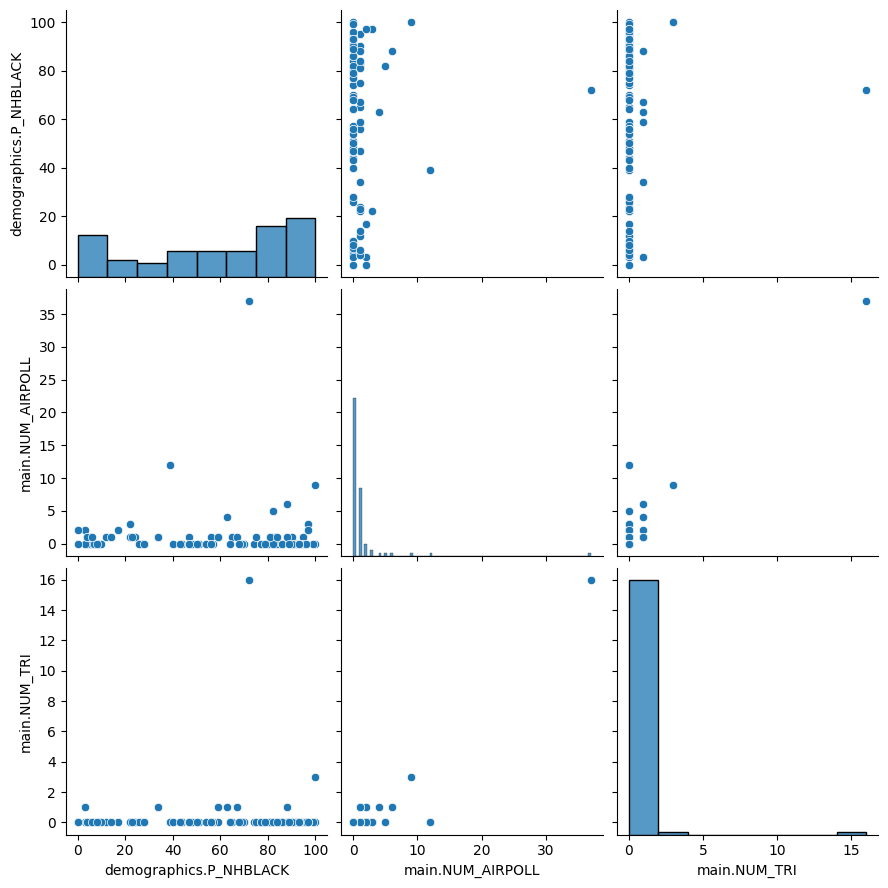

In [29]:
#Visualizing Data

#If you don't already have seaborn
# %pip install --upgrade seaborn
# %pip install --upgrade numpy

import seaborn as sns 
import pandas as pd

#Setting the theme
# sns.set(style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

#Convert to numeric
new_orleans_data[["demographics.P_NHBLACK", "main.NUM_AIRPOLL", "main.NUM_TRI"]] = new_orleans_data[["demographics.P_NHBLACK", "main.NUM_AIRPOLL", "main.NUM_TRI"]].apply(pd.to_numeric)


sns.pairplot(new_orleans_data, vars =["demographics.P_NHBLACK", "main.NUM_AIRPOLL", "main.NUM_TRI"],height=3)
# sns.scatterplot(x="demographics.P_NHBLACK", y="extras.RAW_CI_FLOOD", data= new_orleans_data)


#Outliers problematic

In [30]:
#Pandas DF to SQL DB

#inspired by https://stackoverflow.com/questions/30631325/writing-to-mysql-database-with-pandas-using-sqlalchemy-to-sql
# %pip install sqlalchemy

import pandas as pd
from sqlalchemy import create_engine

engine = create_engine('sqlite:///data_files/new_orleans_epa.db')

new_orleans_data.to_sql('new_orleans_epa', engine, index=False, if_exists='replace')

92

In [31]:
#Check SQL Database

from sqlalchemy import create_engine, text

# Create an engine that connects to the SQLite database file in your data_files directory
engine = create_engine('sqlite:///data_files/new_orleans_epa.db')

# Connect to the database
with engine.connect() as connection:
    # Execute a simple SQL query to count the rows in the new_orleans_epa table
    row_count = connection.execute(text("SELECT COUNT(*) FROM new_orleans_epa")).fetchone()[0]

print(f"The number of rows in the 'new_orleans_epa' table is: {row_count}")

The number of rows in the 'new_orleans_epa' table is: 92
